#Data Collection and Preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ML models

Label Distribution:
sentiment
positive    688
negative    216
neutral      96
Name: count, dtype: int64


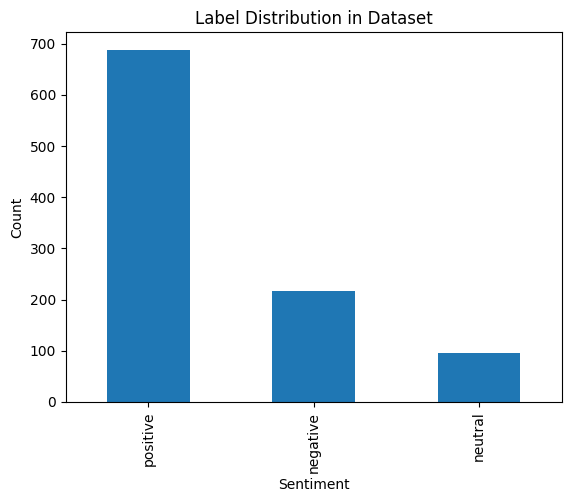

In [13]:
# Display counts of each label in the dataset
label_counts = df['sentiment'].value_counts()
print("Label Distribution:")
print(label_counts)

# Optionally, visualize the label distribution with a bar plot
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')
plt.title("Label Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [4]:

# # Data Collection and Preparation

# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# Load dataset

# %%
# Load required columns and sample for manageable size
df = pd.read_csv('/content/drive/MyDrive/Ironhack_DS&ML/NLP-Project/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Data Cleaning

# %%
# Cleaning and transforming ratings into sentiment labels
df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)

def convert_to_sentiment(score):
    if score in [1, 2, 3]:
        return 'negative'
    elif score == 4:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(convert_to_sentiment)

# Text Cleaning function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = word_tokenize(text)  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

df['cleaned_text'] = df['reviews.text'].apply(clean_text)


# Split Data into Training and Testing

# %%
X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vectorization

# %%
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Building with Grid Search for Hyperparameter Tuning

# %%
# Define hyperparameters for each model
nb_params = {'alpha': [0.5, 1.0, 1.5]}
lr_params = {'C': [0.01, 0.1, 1, 10]}
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear']}

# Initialize models with Grid Search
#nb_model = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1_weighted')
#lr_model = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='f1_weighted')
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1_weighted')
#svm_model = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_weighted')

# Train models
#nb_model.fit(X_train_tfidf, y_train)
#lr_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)
#svm_model.fit(X_train_tfidf, y_train)


# Model Evaluation

# %%
# Evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n---{model_name}---")
    print(f"Best Params: {model.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Evaluate all models
#evaluate_model(nb_model, X_test_tfidf, y_test, "Naive Bayes")
#evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test_tfidf, y_test, "Random Forest")
#evaluate_model(svm_model, X_test_tfidf, y_test, "SVM")


# # Results Summary
# This section will contain model comparison results based on metrics: accuracy, precision, recall, F1-score, and confusion matrix.

dump(rf_model, 'random_forest_model_f.joblib')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



---Random Forest---
Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.8701
Precision: 0.8785
Recall: 0.8701
F1-Score: 0.8594
Confusion Matrix:
[[ 348   14  217]
 [  11  635  447]
 [  22   25 3948]]



['random_forest_model_f.joblib']

In [7]:
from joblib import dump

# Save the fitted TF-IDF vectorizer
dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [1]:
from joblib import dump

# Save each trained model
dump(nb_model, 'naive_bayes_model_f.joblib')
dump(lr_model, 'logistic_regression_model_f.joblib')
dump(rf_model, 'random_forest_model_f.joblib')
dump(svm_model, 'svm_model_f.joblib')

NameError: name 'nb_model' is not defined

#Transformer Model


##Non-fine-tuned


In [7]:
pip install transformers torch


In [6]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Ironhack_DS&ML/NLP-Project/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Convert ratings to sentiment labels
def convert_to_sentiment(score):
    if score in [1, 2, 3]:
        return 'negative'
    elif score == 4:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(convert_to_sentiment)

# Map labels to integers for evaluation
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(label_mapping)

# Load DistilBERT model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline for sentiment analysis with truncation
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict sentiment using DistilBERT with truncation
preds = classifier(df['reviews.text'].tolist(), truncation=True)
predicted_labels = [label_mapping[pred['label'].lower()] for pred in preds]

# Extract true labels
true_labels = df['label'].tolist()

# Evaluation Metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print results
print("Evaluation Metrics for DistilBERT Base Model (without fine-tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['negative', 'neutral', 'positive']))

# Save model and tokenizer
model.save_pretrained('./distilbert_sentiment_model_not_tuned')
tokenizer.save_pretrained('./distilbert_sentiment_model_not_tuned')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# Save model and tokenizer
model.save_pretrained('./distilbert_sentiment_model_not_tuned')
tokenizer.save_pretrained('./distilbert_sentiment_model_not_tuned')
